In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import glob
import os

# Data Preprocessing

In [41]:
data_folder = "data/"

price_files = [
    "prices_round_1_day_-2.csv",
    "prices_round_1_day_-1.csv",
    "prices_round_1_day_0.csv",
]

trade_files = [
    "trades_round_1_day_-2.csv",
    "trades_round_1_day_-1.csv",
    "trades_round_1_day_0.csv",
]

In [53]:
prices = pd.concat([
    pd.read_csv(data_folder + file, sep=';') 
    for file in price_files
])

trades = pd.concat([
    pd.read_csv(data_folder + file, sep=';')
    for file in trade_files
])

In [58]:
INK_prices = prices[prices['product'] == 'SQUID_INK']
INK_trades = trades[trades['symbol'] == 'SQUID_INK']

KELP_prices = prices[prices['product'] == "KELP"]
KELP_trades = trades[trades['symbol'] == "KELP"]

RESIN_pices = prices[prices['product'] == "RAINFOREST_RESIN"]
RESIN_trades = trades[trades['symbol'] == "RAINFOREST_RESIN"]

In [75]:
max_KELP_bid = KELP_prices[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].max(axis=1)
max_KELP_ask = KELP_prices[['ask_volume_1', 'ask_volume_2', 'ask_volume_3']].max(axis=1)

max_INK_bid = INK_prices[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].max(axis=1)
max_INK_ask = INK_prices[['ask_volume_1', 'ask_volume_2', 'ask_volume_3']].max(axis=1)

<Axes: title={'center': 'max single-order BUY volume / total BUY volume'}, ylabel='Frequency'>

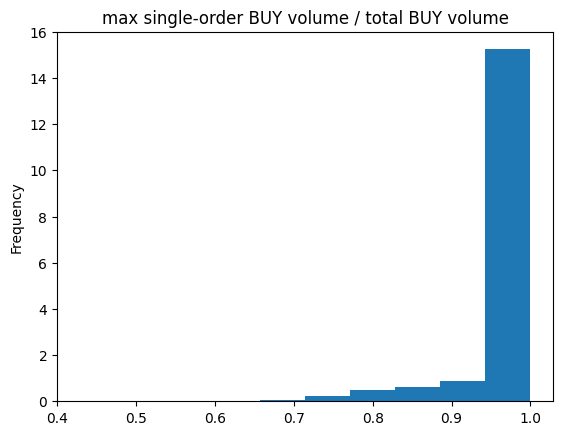

In [83]:
max_order_volume = KELP_prices[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].max(axis=1)
total_volume = KELP_prices[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].sum(axis=1)

ratio = (max_order_volume / total_volume) 
ratio.plot.hist(title="max single-order BUY volume / total BUY volume", density=True)

<Axes: title={'center': 'max single-order SELL volume / total SELL volume'}, ylabel='Frequency'>

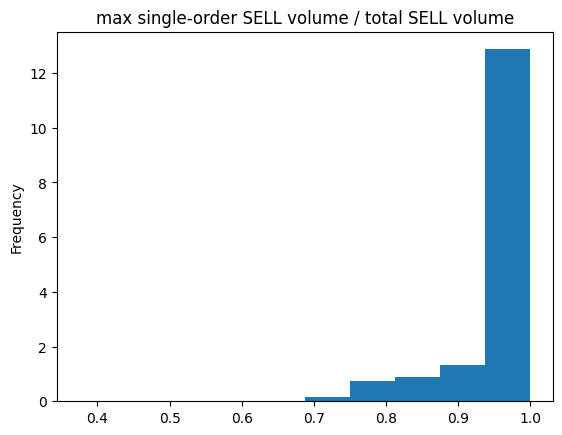

In [84]:
max_order_volume = KELP_prices[['ask_volume_1', 'ask_volume_2', 'ask_volume_3']].max(axis=1)
total_volume = KELP_prices[['ask_volume_1', 'ask_volume_2', 'ask_volume_3']].sum(axis=1)

ratio = (max_order_volume / total_volume) 
ratio.plot.hist(title="max single-order SELL volume / total SELL volume", density=True)

In [96]:
from collections import Counter
Counter((KELP_prices[['ask_price_1', 'ask_price_2', 'ask_price_3']].min(axis=1) - \
 KELP_prices[['bid_price_1', 'bid_price_2', 'bid_price_3']].min(axis=1) ).to_numpy())

Counter({np.float64(3.0): 15704,
         np.float64(4.0): 8341,
         np.float64(2.0): 4658,
         np.float64(1.0): 1297})

In [97]:
15704+8341+4658+1297

30000